
Consider the Zachary’s karate club network from the movie karate kids. Here Zachary tried to analyze conflicts and fission in small groups. The dataset called karate.gml can be read using NetworkX and can be obtained from https://doi.org/10.6084/m9.figshare.7985174.v1 .[GML - Graph Modelling Language.] It contains 34 nodes representing individuals within the karate club. The edges in the network are given by interactions between two individuals outside the activities of the club such as actual lessons or meetings. i. create a graph from the karate.gml file. Display all the basic information about the network. ii. Store all the metadata of the actors in the network. iii. Calculate all types of centrality (degree, betweenness, closeness, eigenvector, pagerank centrality). Analyse the nodes based on the centrality values. Write a note on this. iv. Find the possible k-components of the network and the clustering coefficient. v. Find out the communities using Girvan-Newman algorithm and Louvain method.

In [1]:
import networkx as nx
import matplotlib.pyplot as plt

#i. create a graph from the karate.gml file. Display all the basic information about the network.

Basic Information about the Network:
-------------------------------------
Number of nodes: 34
Number of edges: 78
Average degree: 4.588235294117647
Graph density: 0.13903743315508021
Is the graph directed? False
Is the graph connected? True
Is the graph a tree? False
Is the graph a bipartite graph? False


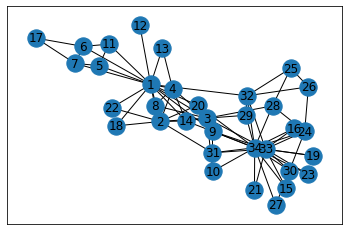

In [2]:
# Load the graph from karate.gml file
G = nx.read_gml(r"karate.gml")

# Display basic information about the network
print("Basic Information about the Network:")
print("-------------------------------------")
print("Number of nodes:", G.number_of_nodes())
print("Number of edges:", G.number_of_edges())
print("Average degree:", sum(dict(G.degree()).values()) / G.number_of_nodes())
print("Graph density:", nx.density(G))
print("Is the graph directed?", nx.is_directed(G))
print("Is the graph connected?", nx.is_connected(G))
print("Is the graph a tree?", nx.is_tree(G))
print("Is the graph a bipartite graph?", nx.is_bipartite(G))

nx.draw_networkx(G)

#ii. Store all the metadata of the actors in the network.

In [3]:
# Create a dictionary to store metadata of actors
actor_metadata = {}

# Iterate over nodes and store metadata
for node in G.nodes(data=True):
    actor_id = node[0]
    actor_attributes = node[1]
    actor_metadata[actor_id] = actor_attributes

# Print metadata of actors
print("Metadata of Actors:")
print("--------------------")
for actor_id, attributes in actor_metadata.items():
    print(f"Actor {actor_id}: {attributes}")

Metadata of Actors:
--------------------
Actor 1: {}
Actor 2: {}
Actor 3: {}
Actor 4: {}
Actor 5: {}
Actor 6: {}
Actor 7: {}
Actor 8: {}
Actor 9: {}
Actor 10: {}
Actor 11: {}
Actor 12: {}
Actor 13: {}
Actor 14: {}
Actor 15: {}
Actor 16: {}
Actor 17: {}
Actor 18: {}
Actor 19: {}
Actor 20: {}
Actor 21: {}
Actor 22: {}
Actor 23: {}
Actor 24: {}
Actor 25: {}
Actor 26: {}
Actor 27: {}
Actor 28: {}
Actor 29: {}
Actor 30: {}
Actor 31: {}
Actor 32: {}
Actor 33: {}
Actor 34: {}


#iii. Calculate all types of centrality (degree, betweenness, closeness, eigenvector, pagerank centrality). Analyse the nodes based on the centrality values. Write a note on this.

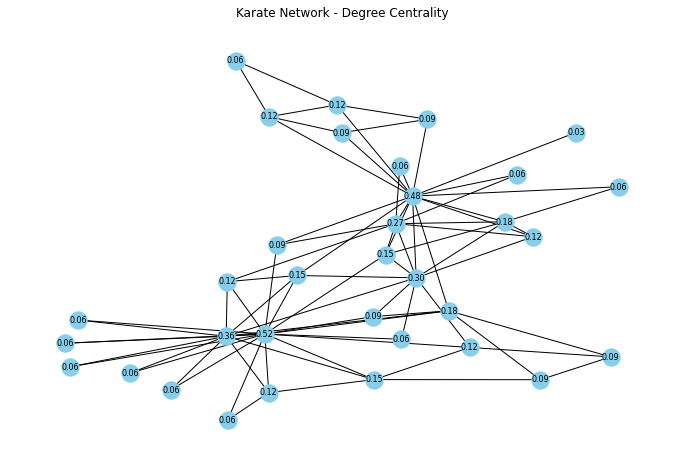

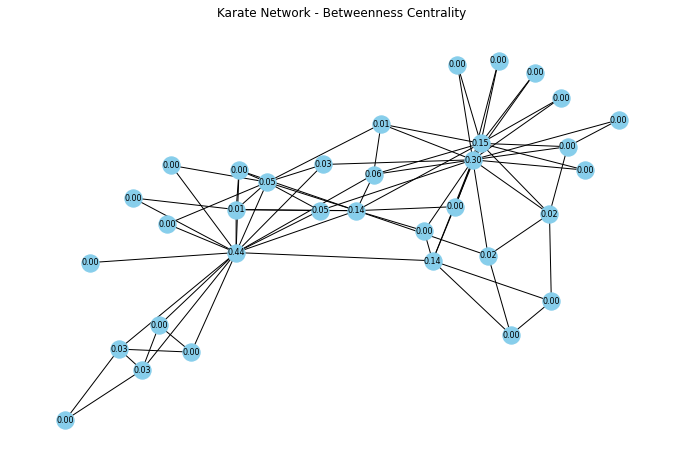

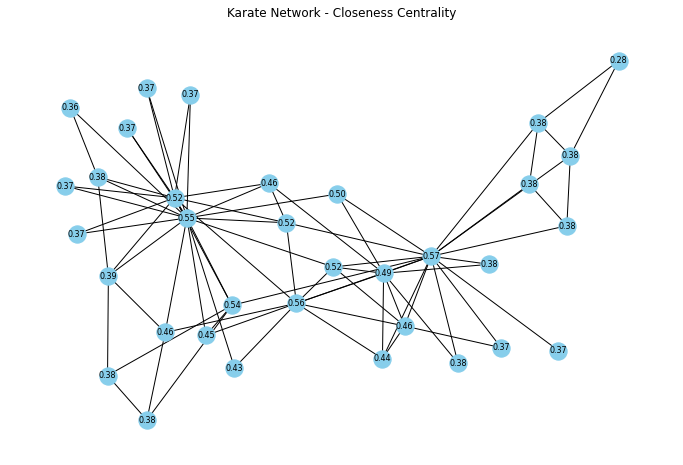

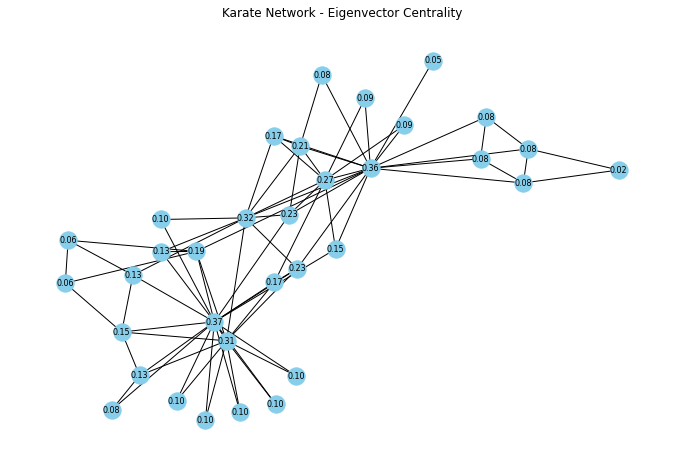

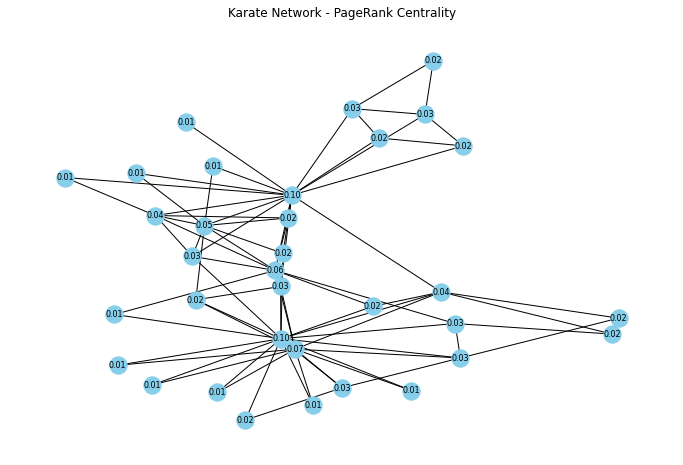

In [4]:
# Calculate centrality measures
degree_centrality = nx.degree_centrality(G)
betweenness_centrality = nx.betweenness_centrality(G)
closeness_centrality = nx.closeness_centrality(G)
eigenvector_centrality = nx.eigenvector_centrality(G)
pagerank_centrality = nx.pagerank(G)

# Function to draw graph with centrality labels
def draw_graph_with_centrality(G, centrality_measure, measure_name):
    pos = nx.spring_layout(G)
    plt.figure(figsize=(12, 8))
    nx.draw_networkx_nodes(G, pos, node_size=300, node_color='skyblue')
    nx.draw_networkx_edges(G, pos)
    nx.draw_networkx_labels(G, pos, labels={node: f"{centrality_measure[node]:.2f}" for node in G.nodes()},
                            font_size=8)
    plt.title(f"Karate Network - {measure_name} Centrality")
    plt.axis('off')
    plt.show()

# Draw graph for each centrality measure
draw_graph_with_centrality(G, degree_centrality, "Degree")
draw_graph_with_centrality(G, betweenness_centrality, "Betweenness")
draw_graph_with_centrality(G, closeness_centrality, "Closeness")
draw_graph_with_centrality(G, eigenvector_centrality, "Eigenvector")
draw_graph_with_centrality(G, pagerank_centrality, "PageRank")

Below code defines a function analyze_centrality to analyze centrality measures for a specific measure. It finds the node with the highest centrality, lists the top 5 nodes with the highest centrality, and calculates the average centrality across all nodes.

In [5]:
# Analyze the centrality measures
def analyze_centrality(centrality_measure, measure_name):
    print(f"Centrality Analysis - {measure_name} Centrality:")
    print("------------------------------------------------")
    # Find the node with the highest centrality
    max_node = max(centrality_measure, key=centrality_measure.get)
    print(f"Node with highest {measure_name} centrality: {max_node} ({centrality_measure[max_node]:.2f})")

    # Sort nodes by centrality measure
    sorted_nodes = sorted(centrality_measure, key=centrality_measure.get, reverse=True)
    print(f"Top 5 nodes with highest {measure_name} centrality:")
    for node in sorted_nodes[:5]:
        print(f"Node {node}: {centrality_measure[node]:.2f}")
    
    # Calculate average centrality
    avg_centrality = sum(centrality_measure.values()) / len(centrality_measure)
    print(f"Average {measure_name} centrality: {avg_centrality:.2f}")
    print()

# Perform centrality analysis for each measure
analyze_centrality(degree_centrality, "Degree")
analyze_centrality(betweenness_centrality, "Betweenness")
analyze_centrality(closeness_centrality, "Closeness")
analyze_centrality(eigenvector_centrality, "Eigenvector")
analyze_centrality(pagerank_centrality, "PageRank")

Centrality Analysis - Degree Centrality:
------------------------------------------------
Node with highest Degree centrality: 34 (0.52)
Top 5 nodes with highest Degree centrality:
Node 34: 0.52
Node 1: 0.48
Node 33: 0.36
Node 3: 0.30
Node 2: 0.27
Average Degree centrality: 0.14

Centrality Analysis - Betweenness Centrality:
------------------------------------------------
Node with highest Betweenness centrality: 1 (0.44)
Top 5 nodes with highest Betweenness centrality:
Node 1: 0.44
Node 34: 0.30
Node 33: 0.15
Node 3: 0.14
Node 32: 0.14
Average Betweenness centrality: 0.04

Centrality Analysis - Closeness Centrality:
------------------------------------------------
Node with highest Closeness centrality: 1 (0.57)
Top 5 nodes with highest Closeness centrality:
Node 1: 0.57
Node 3: 0.56
Node 34: 0.55
Node 32: 0.54
Node 9: 0.52
Average Closeness centrality: 0.43

Centrality Analysis - Eigenvector Centrality:
------------------------------------------------
Node with highest Eigenvector c

iv. #Find the possible k-components of the network and the clustering coefficient.

#iv. Find the possible k-components of the network and the clustering coefficient.

In [6]:
# Calculate possible k-components
k_components = nx.k_components(G)

# Print possible k-components
print("Possible k-components:")
for k, components in k_components.items():
    print(f"k = {k}:")
    for i, component in enumerate(components, start=1):
        print(f"  Component {i}: {component}")
    print()

# Calculate clustering coefficient
clustering_coefficient = nx.average_clustering(G)
print(f"\nClustering Coefficient: {clustering_coefficient:.4f}")

Possible k-components:
k = 4:
  Component 1: {'31', '14', '3', '9', '33', '4', '34', '2', '1', '8'}

k = 3:
  Component 1: {'30', '31', '14', '24', '9', '20', '2', '28', '26', '32', '25', '3', '33', '4', '34', '29', '1', '8'}
  Component 2: {'5', '6', '1', '7', '11'}

k = 2:
  Component 1: {'30', '31', '8', '14', '24', '22', '18', '9', '20', '2', '19', '10', '28', '21', '26', '32', '25', '16', '3', '23', '27', '33', '13', '4', '34', '29', '1', '15'}
  Component 2: {'5', '6', '17', '1', '7', '11'}

k = 1:
  Component 1: {'5', '17', '31', '24', '22', '11', '9', '20', '2', '19', '28', '21', '6', '26', '32', '25', '16', '13', '1', '7', '15', '30', '14', '18', '10', '3', '23', '27', '33', '4', '34', '29', '12', '8'}


Clustering Coefficient: 0.5706


#v. Find out the communities using Girvan-Newman algorithm and Louvain method.

In [8]:
# Girvan-Newman algorithm
print("Communities using Girvan-Newman algorithm:")
communities_gn = nx.algorithms.community.girvan_newman(G)
print(tuple(sorted(c) for c in next(communities_gn)))

# Louvain method
print("\nCommunities using Louvain method:")
communities_louvain = nx.community.kernighan_lin_bisection(G)
louvain_communities = nx.community.greedy_modularity_communities(G)
print(louvain_communities)

Communities using Girvan-Newman algorithm:
(['1', '11', '12', '13', '14', '17', '18', '2', '20', '22', '4', '5', '6', '7', '8'], ['10', '15', '16', '19', '21', '23', '24', '25', '26', '27', '28', '29', '3', '30', '31', '32', '33', '34', '9'])

Communities using Louvain method:
[frozenset({'30', '31', '24', '9', '19', '28', '21', '26', '32', '25', '23', '16', '27', '33', '34', '29', '15'}), frozenset({'14', '18', '22', '3', '13', '4', '2', '10', '8'}), frozenset({'5', '6', '17', '11', '20', '12', '1', '7'})]
